In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import scipy.stats as stats
import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pingouin as pg

# read dataset 
df = pd.read_csv('all_features_by_state.csv')
df.head()

df_dc = df[df['State_x'] == 'District of Columbia']

In [3]:
# inspect first 5 rows
df.head()

,Unnamed: 0,CensusTract,State_x,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,...,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_diff
0,1400000US02013000100,2013000100,Alaska,1,1,1,1,1,1,1,...,378,3051.0,6329.0,159,72,2663.0,-46,0,-46,-0.212302
1,1400000US02016000100,2016000100,Alaska,0,1,1,1,1,1,1,...,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35,0.199189
2,1400000US02016000200,2016000200,Alaska,0,0,0,0,1,0,0,...,322,6177.0,6451.0,246,152,4327.0,117,0,117,-0.160704
3,1400000US02020000101,2020000101,Alaska,0,0,0,0,1,0,0,...,-143,-6171.0,6711.0,-107,-13,NaN,359,0,359,-0.106327
4,1400000US02020000102,2020000102,Alaska,0,0,0,0,1,0,0,...,369,-7766.0,-2535.0,194,57,9355.0,117,0,117,0.018110


In [4]:
# check the columns 
list(df.columns)

['Unnamed: 0',
 'CensusTract',
 'State_x',
 'HUNVFlag_x',
 'LILATracts_1And10_x',
 'LILATracts_halfAnd10_x',
 'LILATracts_Vehicle_x',
 'LATracts1_y',
 'LATracts10_y',
 'LATracts20_y',
 'LATracts_half_y',
 'LATracts1_x',
 'LATracts10_x',
 'LATracts20_x',
 'LATracts_half_x',
 'LILATracts_1And20_x',
 'HUNVFlag_y',
 'LILATracts_1And10_y',
 'LILATracts_halfAnd10_y',
 'LILATracts_Vehicle_y',
 'LILATracts_1And20_y',
 'entropy_index10_y',
 'entropy_index15_x',
 'HUNVFlag_diff',
 'LILATracts_1And10_diff',
 'LILATracts_halfAnd10_diff',
 'LILATracts_Vehicle_diff',
 'LILATracts_1And20_diff',
 'LATracts1_diff',
 'LATracts10_diff',
 'LATracts20_diff',
 'LATracts_half_diff',
 'prop_white',
 'prop_black',
 'prop_asian',
 'prop_hisp',
 'prop_nhopi',
 'prop_aian',
 'prop_multir',
 'totalprop',
 'totalpop10',
 'prop_white10',
 'prop_black10',
 'prop_asian10',
 'prop_hisp10',
 'prop_nhopi10',
 'prop_aian10',
 'prop_multir10',
 'Unnamed: 0_x',
 'STATE2010',
 'NAME2010',
 'B01001_001E2010',
 'B01001_002E201

# Correlation matrixes and Logistic regression for US in general and DC

Note: logistic regression are for the entire country, correlation matrixes are for DC only.

### Correlation matrix for all features, DC only

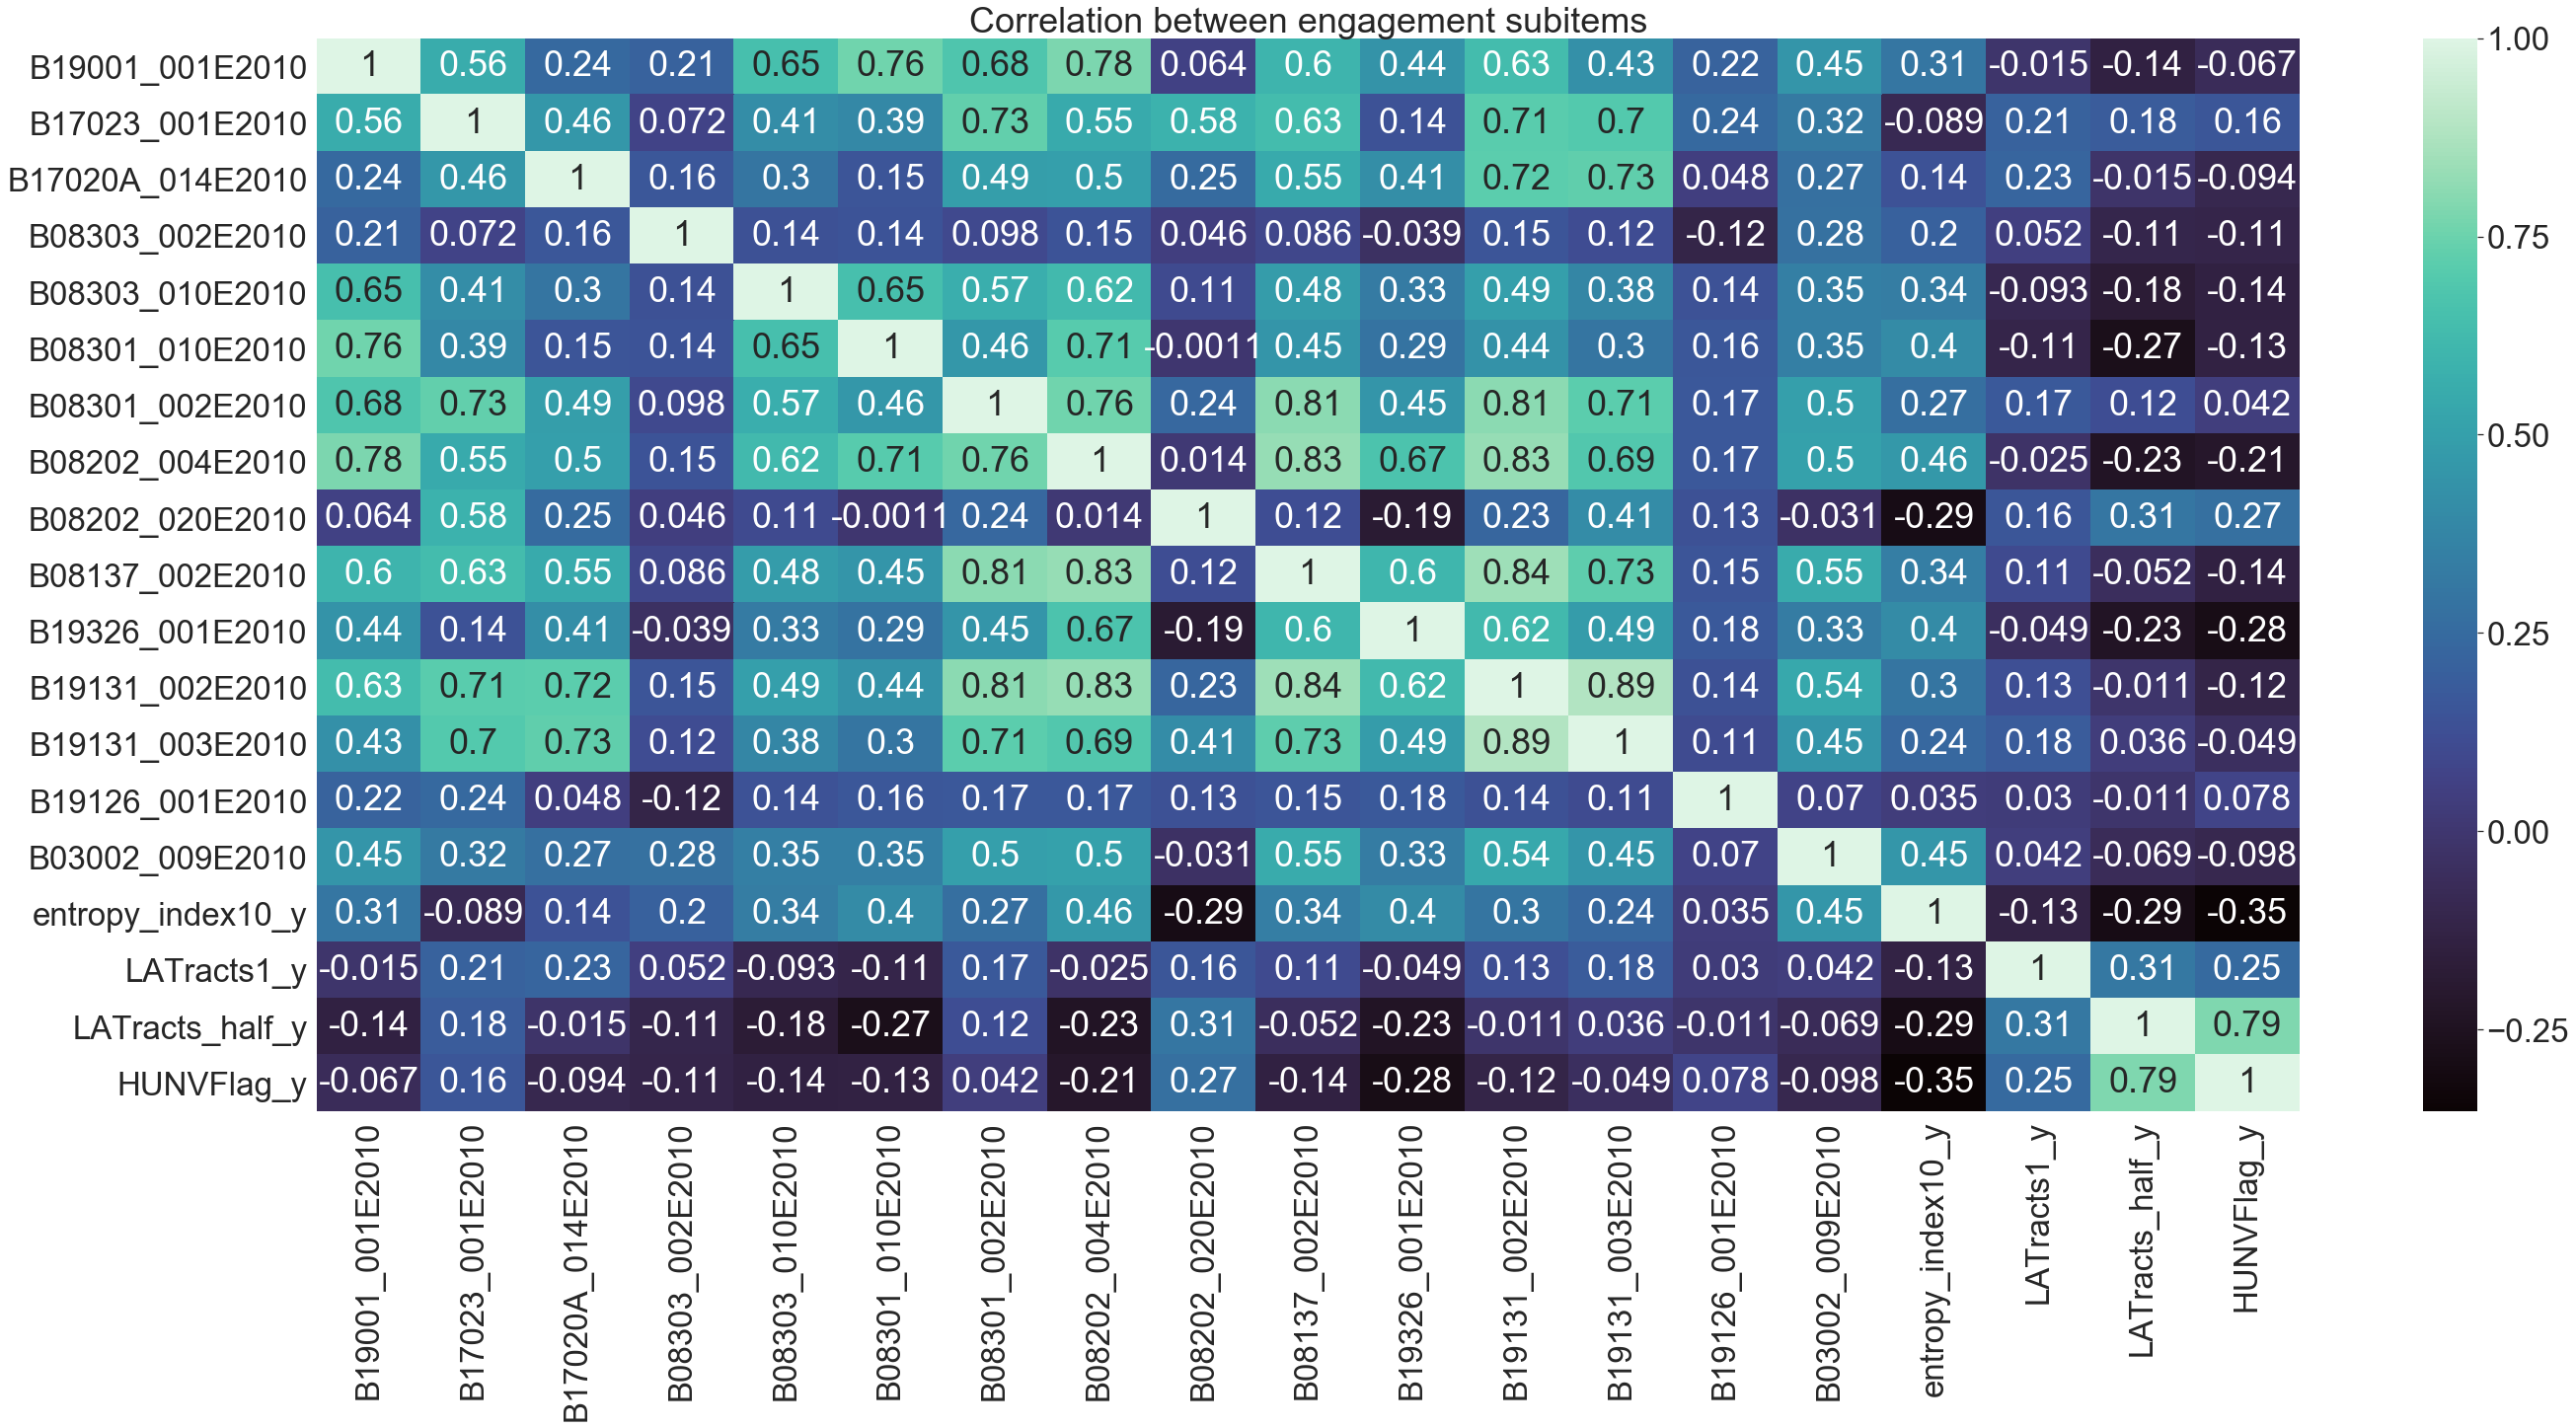

In [10]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix = df_dc[['B19001_001E2010','B17023_001E2010', 'B17020A_014E2010','B08303_002E2010',
             'B08303_010E2010','B08301_010E2010','B08301_002E2010','B08202_004E2010',
             'B08202_020E2010','B08137_002E2010', 'B19326_001E2010','B19131_002E2010','B19131_003E2010',
             'B19126_001E2010','B03002_009E2010', 'entropy_index10_y', 'LATracts1_y', 'LATracts_half_y', 'HUNVFlag_y']].corr()

# visualize matrix 
plt.figure(figsize=(45,20))
sb.set(font_scale = 3)
sb.heatmap(corrMatrix, annot = True, cmap = "mako")
plt.title("Correlation between engagement subitems")
plt.show()

### Logistic regression for HUNV flag, entire US

In [8]:
# identify the independent variables 
ind_cols10 = ['B19001_001E2010', 'B17020A_014E2010', 'B08303_010E2010',
'B08301_010E2010', 'B08202_004E2010', 'B08202_020E2010', 'B08137_002E2010',
'B19131_002E2010','B19131_003E2010','B19126_001E2010', 'entropy_index10_y']


logit1 = sm.Logit(df['HUNVFlag_y'], sm.add_constant(df[ind_cols10]),missing='drop')
result1 = logit1.fit_regularized()

print(result1.summary()) 

Iteration limit exceeded    (Exit mode 9)
            Current function value: inf
            Iterations: 1001
            Function evaluations: 10915
            Gradient evaluations: 1001


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:             HUNVFlag_y   No. Observations:                64573
Model:                          Logit   Df Residuals:                    64561
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                    -inf
Time:                        15:37:24   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -34250.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6289      0.133    -12.226      0.000      -1.890      -1.368
B19001_001E2010       0.0191      0.000     48.035      0.000       0.018       0.020
B17020A_014E2010     -0.

In [21]:
params = result1.params
conf = result1.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
const              0.151071  0.254678    0.196149
B19001_001E2010    1.018485  1.020073    1.019279
B17020A_014E2010   0.993100  0.995646    0.994372
B08303_010E2010    0.962321  0.967694    0.965004
B08301_010E2010    0.979157  0.981042    0.980099
B08202_004E2010    0.963900  0.967130    0.965514
B08202_020E2010    1.061746  1.067789    1.064763
B08137_002E2010    0.983359  0.984731    0.984045
B19131_002E2010    0.985480  0.987065    0.986272
B19131_003E2010    0.974347  0.977585    0.975965
B19126_001E2010    0.999998  1.000005    1.000001
entropy_index10_y  0.211121  0.329487    0.263745


## Correlation matrix for DC using significant and odds ration over 1 ones for the US HUNV flag

Those flags are: B19001_001E2010, B08202_020E2010, B19126_001E2010

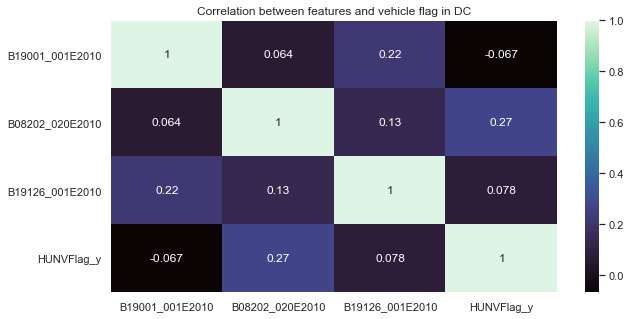

In [22]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix_veh = df_dc[['B19001_001E2010', 'B08202_020E2010', 'B19126_001E2010', 'HUNVFlag_y']].corr()

# visualize matrix 
plt.figure(figsize=(10, 5))
sb.set(font_scale = 1)
sb.heatmap(corrMatrix_veh, annot = True, cmap = "mako")
plt.title("Correlation between features and vehicle flag in DC")
plt.show()

## Logistic regression for LATracts, US 

In [14]:
logit2 = sm.Logit(df['LATracts1_y'], sm.add_constant(df[ind_cols10]),missing='drop')
result2 = logit2.fit_regularized()

print(result2.summary()) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4943725085172496
            Iterations: 48
            Function evaluations: 179
            Gradient evaluations: 48
                           Logit Regression Results                           
Dep. Variable:            LATracts1_y   No. Observations:                64573
Model:                          Logit   Df Residuals:                    64561
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.2695
Time:                        15:55:48   Log-Likelihood:                -31923.
converged:                       True   LL-Null:                       -43700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [23]:
params = result2.params
conf = result2.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
const              1.177798  1.332819    1.252913
B19001_001E2010    0.998976  0.999109    0.999043
B17020A_014E2010   0.999850  1.000303    1.000077
B08303_010E2010    0.999380  1.000191    0.999786
B08301_010E2010    0.993083  0.993580    0.993332
B08202_004E2010    0.999502  0.999965    0.999734
B08202_020E2010    1.000366  1.001099    1.000733
B08137_002E2010    1.000225  1.000363    1.000294
B19131_002E2010    1.004236  1.004606    1.004421
B19131_003E2010    0.996644  0.997251    0.996947
B19126_001E2010    1.000000  1.000000    1.000000
entropy_index10_y  0.381206  0.430830    0.405259


## Corr matrix for DC for signficiant ones for the US LATract1 flag and odds ratio above 1

Those flags are: B17020A_014E2010, B08202_020E2010, B08137_002E2010, B19131_002E2010, B19126_001E2010

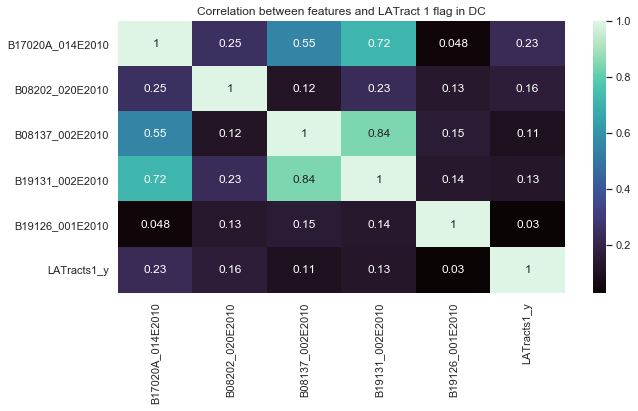

In [25]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix_tract1 = df_dc[['B17020A_014E2010', 'B08202_020E2010', 'B08137_002E2010', 'B19131_002E2010',
                           'B19126_001E2010', 'LATracts1_y']].corr()

# visualize matrix 
plt.figure(figsize=(10, 5))
sb.set(font_scale = 1)
sb.heatmap(corrMatrix_tract1, annot = True, cmap = "mako")
plt.title("Correlation between features and LATract 1 flag in DC")
plt.show()

## Logistic regression for LATract and a half, US

In [18]:
logit3 = sm.Logit(df['LATracts_half_y'], sm.add_constant(df[ind_cols10]),missing='drop')
result3 = logit3.fit_regularized()

print(result3.summary()) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.20926371071490968
            Iterations: 108
            Function evaluations: 670
            Gradient evaluations: 108
                           Logit Regression Results                           
Dep. Variable:        LATracts_half_y   No. Observations:                64573
Model:                          Logit   Df Residuals:                    64561
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.3861
Time:                        15:58:20   Log-Likelihood:                -13513.
converged:                       True   LL-Null:                       -22011.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [26]:
params = result3.params
conf = result3.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
const              2.509310  3.073135    2.776949
B19001_001E2010    1.000028  1.000236    1.000132
B17020A_014E2010   1.000528  1.001484    1.001006
B08303_010E2010    0.997289  0.998782    0.998035
B08301_010E2010    0.994350  0.994719    0.994534
B08202_004E2010    0.999251  1.000060    0.999656
B08202_020E2010    1.000223  1.001502    1.000863
B08137_002E2010    1.001158  1.001383    1.001271
B19131_002E2010    1.002595  1.003300    1.002947
B19131_003E2010    0.995801  0.996984    0.996392
B19126_001E2010    1.000000  1.000000    1.000000
entropy_index10_y  0.601779  0.728465    0.662099


## Corr matrix for DC for signficiant ones for the US LATracthalf flag and odds ration above or equal to 1 

Those variables are: B17020A_014E2010, B19001_001E2010, B08202_020E2010, B08137_002E2010, B19131_002E2010, B19126_001E2010

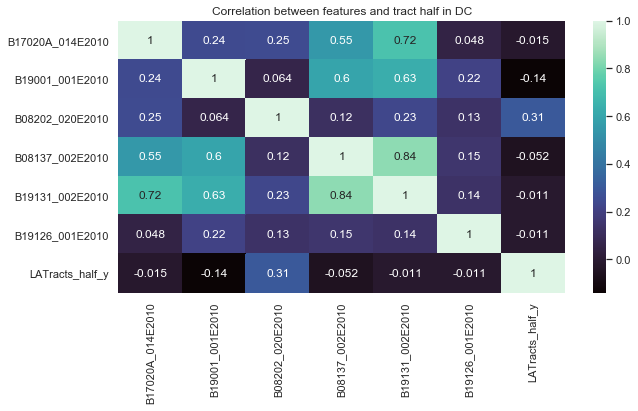

In [27]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix_tract_half = df_dc[['B17020A_014E2010', 'B19001_001E2010', 'B08202_020E2010', 'B08137_002E2010',
                               'B19131_002E2010', 'B19126_001E2010', 'LATracts_half_y']].corr()

# visualize matrix 
plt.figure(figsize=(10, 5))
sb.set(font_scale = 1)
sb.heatmap(corrMatrix_tract_half, annot = True, cmap = "mako")
plt.title("Correlation between features and tract half in DC")
plt.show()

# We have an output, now what?

https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/key-results/

### Step 1: Determine whether the association between the response and the term is statistically significant

To determine whether the association between the response and each term in the model is statistically significant, compare the p-value for the term to your significance level to assess the null hypothesis. The null hypothesis is that the term's coefficient is equal to zero, which indicates that there is no association between the term and the response. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that an association exists when there is no actual association.

* P-value ≤ α: The association is statistically significant
If the p-value is less than or equal to the significance level, you can conclude that there is a statistically significant association between the response variable and the term.

* P-value > α: The association is not statistically significant
If the p-value is greater than the significance level, you cannot conclude that there is a statistically significant association between the response variable and the term. You may want to refit the model without the term.

<b>If there are multiple predictors without a statistically significant association with the response, you must reduce the model by removing terms one at a time. For more information on removing terms from the model, go to Model reduction.</b> 

If a model term is statistically significant, the interpretation depends on the type of term. 

The interpretations are as follows:
* If a continuous predictor is significant, you can conclude that the coefficient for the predictor does not equal zero.
* If a categorical predictor is significant, you can conclude that not all the level means are equal.

<i>In our model, only one term is statistically significant, entropy_diff. However, we still need to do some model reduction to remove redundancy. </i>

### Step 2: Understand the effects of the predictors

Use the odds ratio to understand the effect of a predictor.

<b>Odds Ratios for Continuous Predictors</b>

Odds ratios that are greater than 1 indicate that the even is more likely to occur as the predictor increases. Odds ratios that are less than 1 indicate that the event is less likely to occur as the predictor increases.

<i> Since our predictors are continuous, we are looking for odds ration more than 1. Entropy_diff is 1.5, indicating that food desert is more likely to disappear as the predictor increases </i>

### Step 3: Determine how well the model fits your data

To determine how well the model fits your data, examine the statistics in the Model Summary table. For binary logistic regression, the data format affects the deviance R2 statistics but not the AIC. For more information, go to For more information, go to How data formats affect goodness-of-fit in binary logistic regression.

<i> our current model has a rsq val of 0.018, which we hope to improve when reducing the model </i> 
